# Aplicaciones del PDS en genómica
Los esfuerzos en primer isntancia fueron por traducir secuencia de ADN a secuencia numérica. Cada años alen nuevas representaciones, que no son completamente novedosas.

EL conocimiento de los exones fue muy relevante, los intrones se tratan como ruido. En los exones aparece cierta periodicidad, y esto lo podemos analizar con las herramientas de SyS.

## Representaciones
### Representación binaria (Voss)
Mapea los nucleótidos en vuatro secuencias binarias indicadoras:
$x_A$
$x_G$
$x_C$
$x_T$

Son en función de la posicón, no del tiempo.

## Preiccion de exónes
Como hay periodicidad en la frecuencia de bases, se analiza con Fourier. Si no hay exones debería esperar ruido en el espectro de magnitud.

### Medicción del contenido espectral (SC)
Hacen la suma de los espectros en potencia 2. Y se muestra eso.Sobre el pedazo de exon esperaria periodicidad y sobre el otro nada.

## Filtro anti-notch
Pone un filtro selectivo de una frecuencia para ver la magnitud del pico. Suma las 4 magnitudes selectivas.

## Espectrograma
La limitacion que tiene Fourier es que el espectro que estamos viendo es de la señal completa. Cada fila será un espectro, la siguiente surge de de ventanear. En el espectrograma que se puede ver en las diapos hau una banda oscura que sería el expone. Puedo hacer un espectro de toda la secuencia pero no voy a saber donde se está dando el pico, por eso es útil es epectrograam.

# Predicción de genes probables mediante análisis de Fourier

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from numpy.fft import *
import os
import argparse

In [2]:
import scipy.io
mat = scipy.io.loadmat('seNales/seq2_Sequence.mat')

In [3]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Thu Oct  8 16:04:47 2015',
 '__version__': '1.0',
 '__globals__': [],
 'cad': array(['CCAGCTGCAGCCATGAAGTGCCTCCTGCTTGCCCTGGGCCTGGCCCTCGCCTGTGGCATCCAGGCCATCATCGTCACCCAGACCATGAAAGGCCTGGACATCCAGAAGGTGGCGGGGACTTGGTACTCCTTGGCTATGGCGGCCAGCGACATCTCCCTGCTGGACGCCCAGAGTGCCCCCCTGAGAGTGTACGTGGAGGAGCTGAAGCCCACCCCCGAGGGCAACCTGGAGATCCTGCTGCAGAAATGGGAGAACGGCGAGTGTGCTCAGAAGAAGATTATTGCAGAAAAAACCAAGATCCCTGCGGTGTTCAAGATCGATGCCTTGAACGAGAACAAAGTCCTTGTGCTGGACACCGACTACAAAAAGTACCTGCTCTTCTGCATGGAAAACAGTGCTGAGCCCGAGCAAAGCCTGGCCTGCCAGTGCCTGGTCAGGACCCCAGAGGTGGACAAGGAGGCCCTGGAGAAATTCGACAAAGCCCTCAAGGCCCTGCCCATGCACATCCGGCTCGCCTTCAACCCGACCCAGCTGGAGGGGCAGTGCCACGTCTAGGTGAGCCCCTGCCGGCGCCTCTGTGGGCCCGGGAGCCTTGGCCCCTCTGGGGACAGACGACGTCACCCCCGCCTCCCCCATCAGGGGGACCAGGAGGGACCGGGACCGCCGTCACCTCTCCTGGGACCCAGGCCCCTCCAGGCCCCTCCTGTGGCCTCCTGCTCGGGGCCGCTCCTCCTTCAGCAATAAAGGCATAAACC'],
       dtype='<U755')}

In [4]:
fasta_seq = mat['cad'][0]

In [5]:
fasta_seq

'CCAGCTGCAGCCATGAAGTGCCTCCTGCTTGCCCTGGGCCTGGCCCTCGCCTGTGGCATCCAGGCCATCATCGTCACCCAGACCATGAAAGGCCTGGACATCCAGAAGGTGGCGGGGACTTGGTACTCCTTGGCTATGGCGGCCAGCGACATCTCCCTGCTGGACGCCCAGAGTGCCCCCCTGAGAGTGTACGTGGAGGAGCTGAAGCCCACCCCCGAGGGCAACCTGGAGATCCTGCTGCAGAAATGGGAGAACGGCGAGTGTGCTCAGAAGAAGATTATTGCAGAAAAAACCAAGATCCCTGCGGTGTTCAAGATCGATGCCTTGAACGAGAACAAAGTCCTTGTGCTGGACACCGACTACAAAAAGTACCTGCTCTTCTGCATGGAAAACAGTGCTGAGCCCGAGCAAAGCCTGGCCTGCCAGTGCCTGGTCAGGACCCCAGAGGTGGACAAGGAGGCCCTGGAGAAATTCGACAAAGCCCTCAAGGCCCTGCCCATGCACATCCGGCTCGCCTTCAACCCGACCCAGCTGGAGGGGCAGTGCCACGTCTAGGTGAGCCCCTGCCGGCGCCTCTGTGGGCCCGGGAGCCTTGGCCCCTCTGGGGACAGACGACGTCACCCCCGCCTCCCCCATCAGGGGGACCAGGAGGGACCGGGACCGCCGTCACCTCTCCTGGGACCCAGGCCCCTCCAGGCCCCTCCTGTGGCCTCCTGCTCGGGGCCGCTCCTCCTTCAGCAATAAAGGCATAAACC'

In [6]:
# Tiwari, S., Ramachandran, S., Bhattacharya, A., Bhattacharya, S. & Ramaswamy, R.
# Prediction of probable genes by Fourier analysis of genomic sequences.
# Comput. Appl. Biosci. 13, 263–270 (1997).

def fourier_genome(seq):
    xA=[0 for i in range(0,len(seq))]
    xT=[0 for i in range(0,len(seq))]
    xG=[0 for i in range(0,len(seq))]
    xC=[0 for i in range(0,len(seq))]

    for i in range(0,len(seq)):
        if seq[i]=="A":xA[i]=1
        if seq[i]=="T":xT[i]=1
        if seq[i]=="G":xG[i]=1
        if seq[i]=="C":xC[i]=1

    xhatA=abs(fft(xA))
    xhatG=abs(fft(xG))
    xhatT=abs(fft(xT))
    xhatC=abs(fft(xC))

    l = int(len(xhatA))
    xhat=[(xhatA[i]**2+xhatT[i]**2+xhatC[i]**2+xhatG[i]**2)*2/len(seq) for i in range(int(l/2),l)]
    return(xhat,[float(i)/len(xhat) for i in range(0,len(xhat))])

In [7]:
def P(spectrum):
    x=len(spectrum)
    k=int(min(x/3,50))
    peak=max(spectrum[int(x/3)-k:int(x/3)+k])
    p=x*peak/sum(spectrum)
    return(p)

In [10]:
ofile = open('seNales/seq2_Sequence.fasta', 'w')
ofile.write(">" + 'cad' + "\n" + fasta_seq + "\n")
ofile.close()

Text(0.75, 10.410041525040828, 'P=9.46')

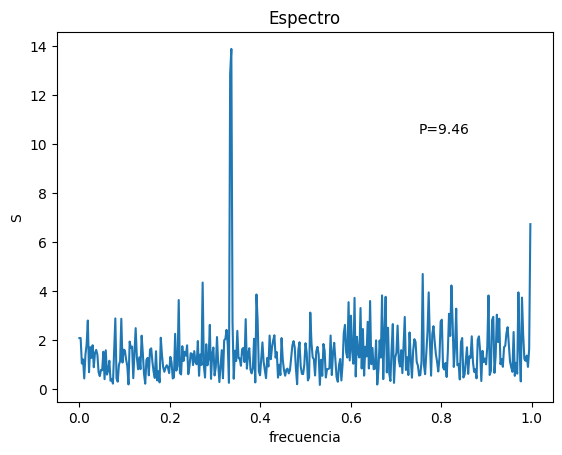

In [11]:
# Es la secuencia de un exón, por eso lo pasamos entero a fourier
ff_p, freq_p=fourier_genome(fasta_seq)
p=P(ff_p)
plt.figure(1)
plt.plot(freq_p,ff_p)
plt.title("Espectro")
plt.xlabel("frecuencia")
plt.ylabel("S")
y_text = max(ff_p)*0.75
plt.text(0.75,y_text,"P=%.2f"%p)

# Ejemplo de aplicación con secuencia fasta del gen TP53

A continuación se listan los pasos para poder realizar una descarga y procesamiento de una secuencia FASTA de un gen. En este caso utilizaremos el gen TP53 (tumor protein p53).

1.   Entramos a la [página del NCBI](https://www.ncbi.nlm.nih.gov/) (National Center of Biotechnology Information).
2.   En la parte superior veremos un buscador, en donde veremos la opción por default, que es "All databases", y seleccionaremos la opción Gene.
3.   En el buscador colocamos el nombre del gen, en este ejemplo usaremos el TP53, y apretamos el botón Search.
4.   Aparecerán los resultados donde podremos filtrar por el organismo al que pertenecen, entre otras cosas. Seleccionaremos la primera opción "tumor protein p53 [Homo sapiens (human)]"
5.   Nos dirigimos hacia la sección de "Genomic regions, transcripts, and products". Y a la derecha, en "go to nucleotide: " seleccionamos FASTA y nos redirige a la página de la secuencia en formato FASTA.
6.   En un bloc de notas, copiamos la secuencia SIN la primer línea, la guardamos como TXT y subimos al Colab para poder utilizarla.
7.   Reusando el código python que implementa el artículo de 1997, procedemos a leer y procesar la secuencia que descargamos, analizando y buscando alguna región donde haya un exón.


La cátedra agradece el trabajo cedido por sus autores, los alumnos 2022:
*   Elorza, Tatiana
*   Erni, Esteban
*   Lescano, Felipe

In [14]:
# CAMBIAR LA RUTA!!!
seq=np.loadtxt("seNales/tp53.txt",dtype='str')

In [15]:
seq

array(['CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTGCGTTCGGGC',
       'TGGGAGCGTGCTTTCCACGACGGTGACACGCTTCCCTGGATTGGGTAAGCTCCTGACTGAACTTGATGAG',
       'TCCTCTCTGAGTCACGGGCTCTCGGCTCCGTGTATTTTCAGCTCGGGAAAATCGCTGGGGCTGGGGGTGG',
       'GGCAGTGGGGACTTAGCGAGTTTGGGGGTGAGTGGGATGGAAGCTTGGCTAGAGGGATCATCATAGGAGT',
       'TGCATTGTTGGGAGACCTGGGTGTAGATGATGGGGATGTTAGGACCATCCGAACTCAAAGTTGAACGCCT',
       'AGGCAGAGGAGTGGAGCTTTGGGGAACCTTGAGCCGGCCTAAAGCGTACTTCTTTGCACATCCACCCGGT',
       'GCTGGGCGTAGGGAATCCCTGAAATAAAAGATGCACAAAGCATTGAGGTCTGAGACTTTTGGATCTCGAA',
       'ACATTGAGAACTCATAGCTGTATATTTTAGAGCCCATGGCATCCTAGTGAAAACTGGGGCTCCATTCCGA',
       'AATGATCATTTGGGGGTGATCCGGGGAGCCCAAGCTGCTAAGGTCCCACAACTTCCGGACCTTTGTCCTT',
       'CCTGGAGCGATCTTTCCAGGCAGCCCCCGGCTCCGCTAGATGGAGAAAATCCAATTGAAGGCTGTCAGTC',
       'GTGGAAGTGAGAAGTGCTAAACCAGGGGTTTGCCCGCCAGGCCGAGGAGGACCGTCGCAATCTGAGAGGC',
       'CCGGCAGCCCTGTTATTGTTTGGCTCCACATTTACATTTCTGCCTCTTGCAGCAGCATTTCCGGTTTCTT',
       'TTTGCCGGAGCAGCTCACTA

In [16]:
seq.shape

(273,)

In [17]:
seq[0]

'CTCAAAAGTCTAGAGCCACCGTCCAGGGAGCAGGTAGCTGCTGGGCTCCGGGGACACTTTGCGTTCGGGC'

In [18]:
len(seq[0])

70

Text(0.75, 3.165437915945585, 'P=2.52')

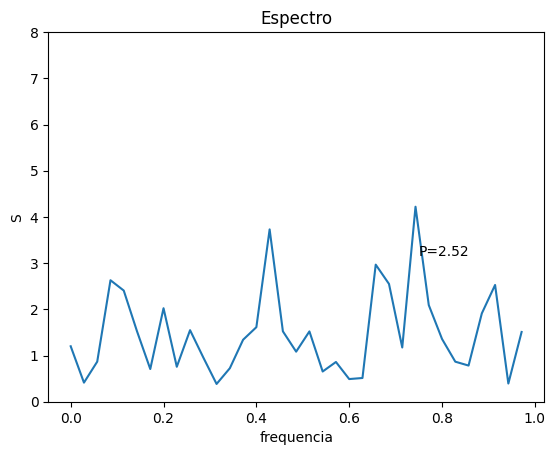

In [19]:
ff_p, freq_p=fourier_genome(seq[0])
p=P(ff_p)
plt.figure(1)
plt.plot(freq_p,ff_p)
plt.title("Espectro")
plt.xlabel("frequencia")
plt.ylabel("S")
plt.ylim([0,8])
y_text = max(ff_p)*0.75
plt.text(0.75,y_text,"P=%.2f"%p)

P<4 --> no es exón

Text(0.75, 5.277577277010872, 'P=5.37')

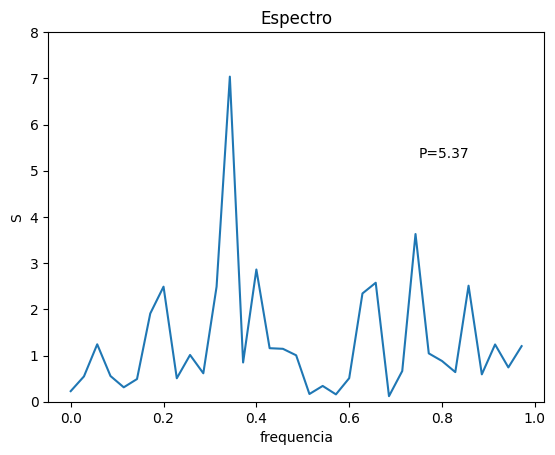

In [20]:
ff_p, freq_p=fourier_genome(seq[162])
p=P(ff_p)
plt.figure(1)
plt.plot(freq_p,ff_p)
plt.title("Espectro")
plt.xlabel("frequencia")
plt.ylabel("S")
plt.ylim([0,8])
y_text = max(ff_p)*0.75
plt.text(0.75,y_text,"P=%.2f"%p)

Como el valor de P>4 y el pico está en N/3, significa que hay un exón presente en esa región del gen.

In [24]:
pos = 0
posiciones = []
for fragm in seq:
    ff_p, freq_p = fourier_genome(fragm)
    p = P(ff_p)
    if(p>=4):
        print(f"{pos} posible exon")
        posiciones.append(pos)
    pos +=1

44 posible exon
53 posible exon
74 posible exon
115 posible exon
116 posible exon
153 posible exon
162 posible exon
263 posible exon


In [26]:
len(posiciones)

8

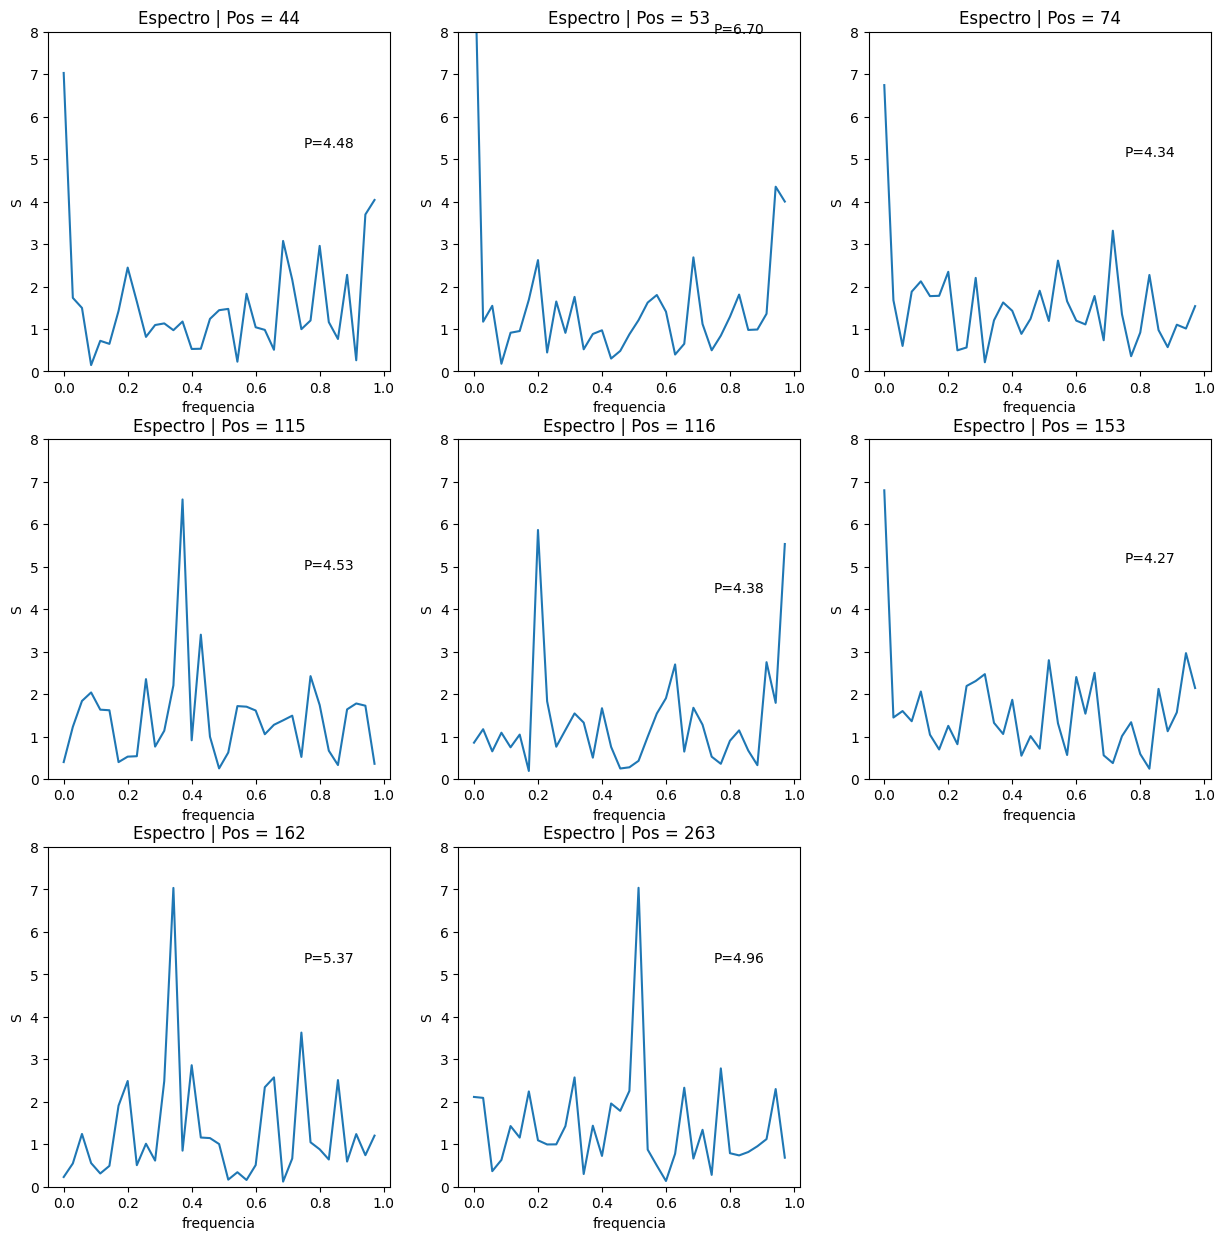

In [36]:
cont = 0
plt.figure(figsize=(15, 15))
for i in posiciones:
    ff_p, freq_p=fourier_genome(seq[i])
    p=P(ff_p)
    plt.subplot(int(f"33{cont+1}"))
    plt.plot(freq_p,ff_p)
    plt.title(f"Espectro | Pos = {i}")
    plt.xlabel("frequencia")
    plt.ylabel("S")
    plt.ylim([0,8])
    y_text = max(ff_p)*0.75
    plt.text(0.75,y_text,"P=%.2f"%p)
    cont +=1
plt.show()